In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import seaborn as sns

# Data Visualization and Exploratory Data Analysis Lab
## Visualizing and exploring data. The data mining process

In this lab, you'll get acquainted with the most streamed songs on Spotify in 2024. The dataset and its associated metadata can be found [here](https://www.kaggle.com/datasets/nelgiriyewithana/most-streamed-spotify-songs-2024). The version you'll need is provided in the `data/` folder.

You know the drill. Do what you can / want / need to answer the questions to the best of your ability. Answers do not need to be trivial, or even the same among different people.

### Problem 1. Read the dataset (1 point)
Read the file without unzipping it first. You can try a different character encoding, like `unicode_escape`. Don't worry too much about weird characters.

In [90]:
spotify_data = pd.read_csv('data/spotify_most_streamed_2024.zip', encoding='unicode_escape')

# To show all the columns
pd.set_option('display.max_columns', None)

spotify_data

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,YouTube Playlist Reach,Apple Music Playlist Count,AirPlay Spins,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",92.0,"84,274,754","1,713,126","5,767,700","651,565,900","5,332,281,936","150,597,040",210.0,"40,975",684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",92.0,"116,347,040","3,486,739","674,700","35,223,547","208,339,025","156,380,351",188.0,"40,778",3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",92.0,"122,599,116","2,228,730","3,025,400","275,154,237","3,369,120,610","373,784,955",190.0,"74,333",536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",85.0,"1,096,100,899","10,629,796","7,189,811","1,078,757,968","14,603,725,994","3,351,188,582",394.0,"1,474,799","2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",88.0,"77,373,957","3,670,188","16,400",NaN,NaN,"112,763,851",182.0,"12,185",1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,9/5/2017,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",71.0,"149,247,747","1,397,590","48,370","20,202,000","143,934,379","53,016",3.0,6,NaN,2.0,"14,217",NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,7/27/2018,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",56.0,"943,920,245","5,347,766",NaN,"1,721","19,935","24,973,048",1.0,412,NaN,1.0,927,NaN,NaN,NaN,NaN,"193,590",NaN,0
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2/28/2020,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",65.0,"201,027,333","1,081,402","7,596","5,288,677","36,849,005","29,253,152",19.0,204,NaN,1.0,74,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,11/8/2016,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",66.0,"1,118,595,159","3,868,828","11,433","2,534,831","37,757,301","25,150,516",1.0,"1,200",NaN,NaN,NaN,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0


### Problem 2. Perform some cleaning (1 point)
Ensure all data has been read correctly; check the data types. Give the columns better names (e.g. `all_time_rank`, `track_score`, etc.). To do so, try to use `apply()` instead of a manual mapping between old and new name. Get rid of any unnecessary ones.

In [91]:
spotify_data.columns = spotify_data.columns.to_series().apply(
    lambda x: x.replace(' ', '_').lower()
)
# We see that the tidal_popularity is all NaN values so we can drop it.
spotify_data[spotify_data.tidal_popularity.notna()]

spotify_data.drop(columns=['tidal_popularity'], inplace=True)

# I don't see anymore unnecessary columns, so let's proceed with the analysis.

### Problem 3. Most productive artists (1 point)
Who are the five artists with the most songs in the dataset?

Who are the five "clean-mouthed" artists (i.e., with no explicit songs)? **Note:** We're not going into details but we can start a discussion about whether a song needs swearing to be popular.

In [92]:
# The top 5 artists with the most songs are the following:
spotify_data.artist.value_counts().head(5)

# The top 5 "clean-mouthed" artisrs... let's see how we can distinguish them.
spotify_data

#Okay, we have a flag column called explicit_track, we can first filter the clean tracks and then get the top 5 artists.
clean_songs = spotify_data[spotify_data.explicit_track == False]
top_5_clean_artists = clean_songs.artist.value_counts().head(5)
top_5_clean_artists

artist
Taylor Swift     50
Billie Eilish    25
KAROL G          18
Bad Bunny        18
Morgan Wallen    17
Name: count, dtype: int64

### Problem 4. Most streamed artists (1 point)
And who are the top five most streamed (as measured by Spotify streams) artists?

In [93]:
# Top 5 most streamed... this means that we need to combine their songs and streams and calculate it then
# The type of that column seems to be Object.
spotify_data.spotify_streams.dtype

# So let's try and convert it to float.
spotify_data.spotify_streams = spotify_data.spotify_streams.str.replace(',', '').astype(float)

In [94]:
# Now that the values are numeric types, we can calculate the top 5 streamed artists.
top5_streamed_artists = (spotify_data.groupby('artist')['spotify_streams'].sum().sort_values(ascending=False).head(5))
top5_streamed_artists

# Bad bunny is number 1... crazy, I dont even think I know any of his songs.

artist
Bad Bunny       3.705483e+10
The Weeknd      3.694854e+10
Drake           3.496216e+10
Taylor Swift    3.447077e+10
Post Malone     2.613747e+10
Name: spotify_streams, dtype: float64

### Problem 5. Songs by year and month (1 point)
How many songs have been released each year? Present an appropriate plot. Can you explain the behavior of the plot for 2024?

How about months? Is / Are there (a) popular month(s) to release music?

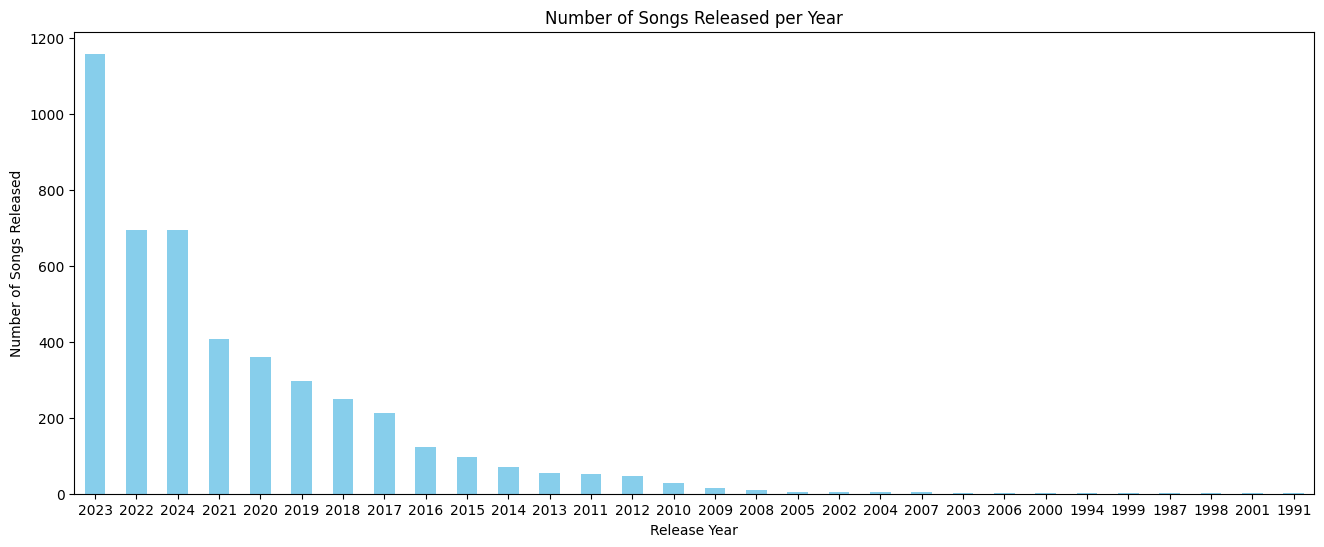

(1158, 693)

In [95]:
# Let's first extract the release year for easier analysis.
spotify_data['release_year'] = spotify_data.release_date.str.split('/').str[2].astype(int)

# Now We can see the amount of songs released per year.
songs_per_year = spotify_data.release_year.value_counts()
songs_per_year
# In 2023 there were 1158 songs released, which is the highest number in the dataset.

# Now let's visualize it.
songs_per_year.plot(kind='bar', figsize=(16, 6), color='skyblue')

plt.xlabel('Release Year')
plt.ylabel('Number of Songs Released')
plt.title('Number of Songs Released per Year')

plt.xticks(rotation=0)

plt.show()

# About the behavious or 2024.. it has one song less than in 2022, and a lot less than 2023. Since song releases grow exponentionally as it seems, that might be a sign that artists
# are slowing down in 2024, or we don't have the full dataset, or the data was collected mid year.. it can be a lot of things.
# Let's extract the month and check...
spotify_data['release_month'] = spotify_data.release_date.str.split('/').str[0].astype(int)
spotify_data[spotify_data.release_year == 2024].release_month.value_counts().sort_index()

# Yep, it seems like the data was collected during June, meaning about half the year is missing.
song_counts_2023 = spotify_data[spotify_data.release_year == 2023].shape[0]
song_counts_2024 = spotify_data[spotify_data.release_year == 2024].shape[0]

song_counts_2023, song_counts_2024

# We see that 2023 had 1158 songs, while 2024 had 693... but for half a year (meybe even less). So if we multiply 693 by two, in order to get a full year
# (considering the amount of songs released per month stay the same), we get 1386 songs, which is more than 2023. Meaning the dataset is good.

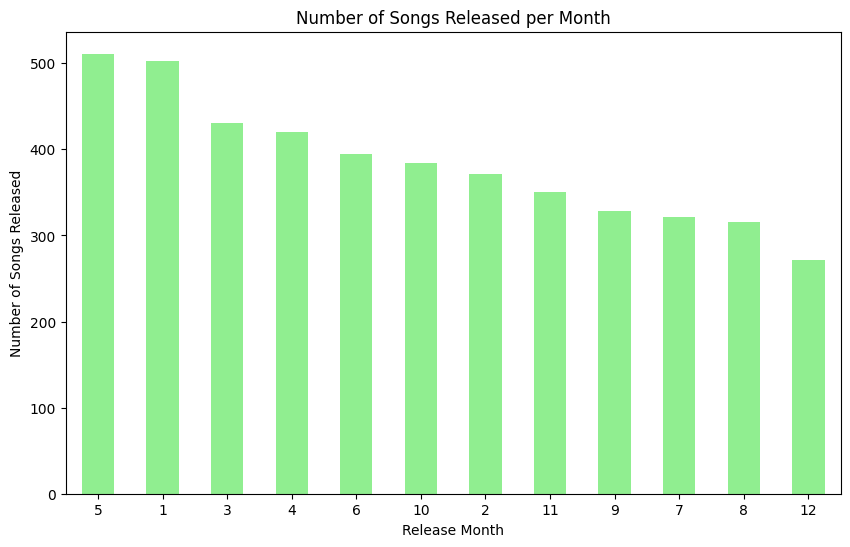

In [96]:
# Now let's see if there are any popular months to release music.
monthly_release_counts = spotify_data.release_month.value_counts()
monthly_release_counts

# Seems like most popular is May, followed by January and March.
# Let's visualize it.
monthly_release_counts.plot(kind='bar', figsize=(10, 6), color='lightgreen')

plt.xlabel('Release Month')
plt.ylabel('Number of Songs Released')
plt.title('Number of Songs Released per Month')

plt.xticks(rotation=0)

plt.show()

### Problem 6. Playlists (2 points)
Is there any connection (correlation) between users adding a song to playlists in one service, or another? Only Spotify, Apple, Deezer, and Amazon offer the ability to add a song to a playlist. Find a way to plot all these relationships at the same time, and analyze them. Experiment with different types of correlations.

C:\Users\vladi\AppData\Local\Temp\ipykernel_13060\3699374390.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  playlist_counts.spotify_playlist_count = playlist_counts.spotify_playlist_count.str.replace(',', '').astype(float)


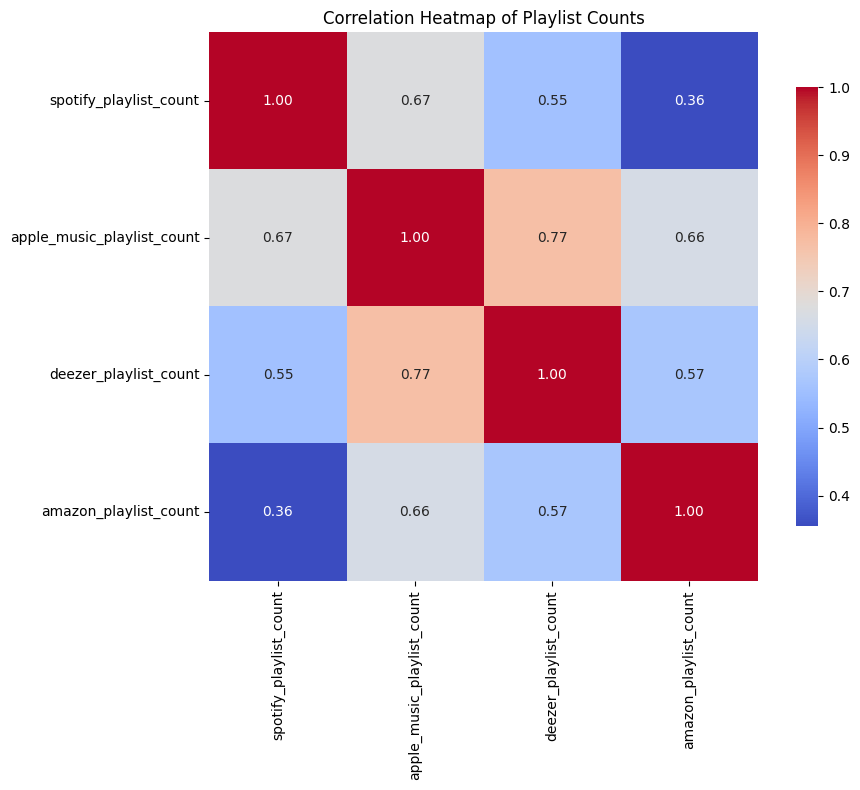

In [97]:
# Let's display the correlation...
playlist_counts = spotify_data[['spotify_playlist_count', 'apple_music_playlist_count', 'deezer_playlist_count', 'amazon_playlist_count']]
#playlist_counts = playlist_counts.apply(pd.to_numeric, errors='coerce')
playlist_counts.spotify_playlist_count = playlist_counts.spotify_playlist_count.str.replace(',', '').astype(float)
playlist_counts = playlist_counts.dropna()

correlation_values = playlist_counts.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_values, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap of Playlist Counts')

plt.tight_layout()
plt.show()

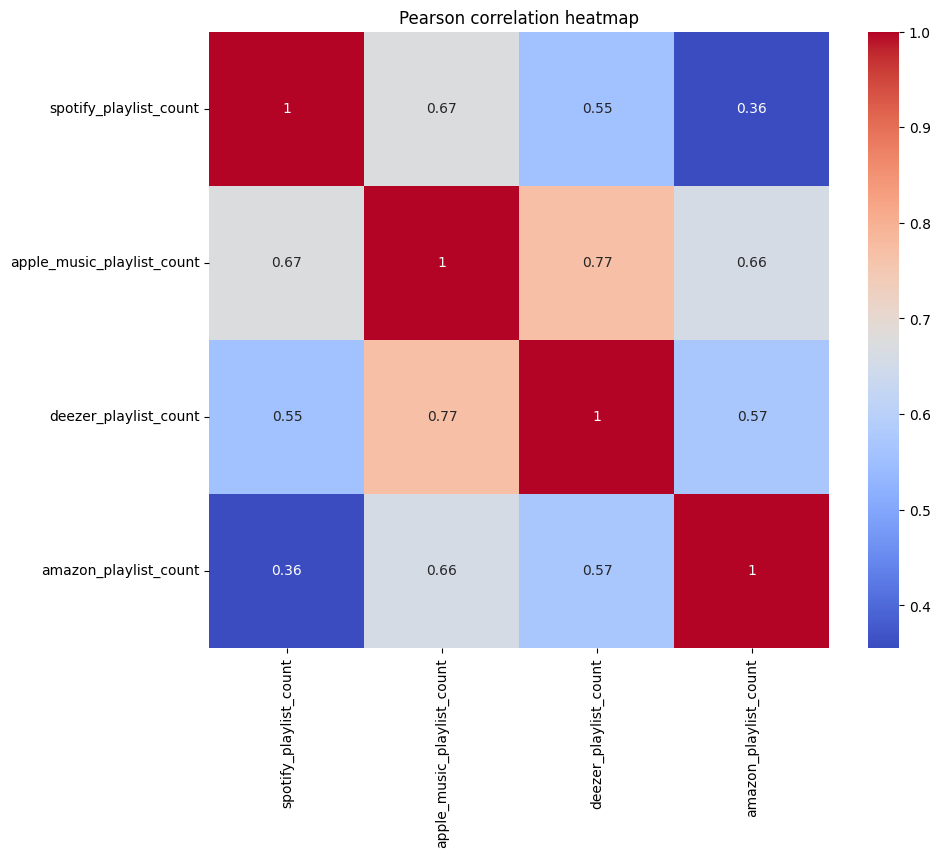

In [98]:
# Now let's try different types of correlations, first 'pearson'
corr_pearson = playlist_counts.corr(method='pearson')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_pearson, annot=True, cmap='coolwarm')
plt.title('Pearson correlation heatmap')
plt.show()

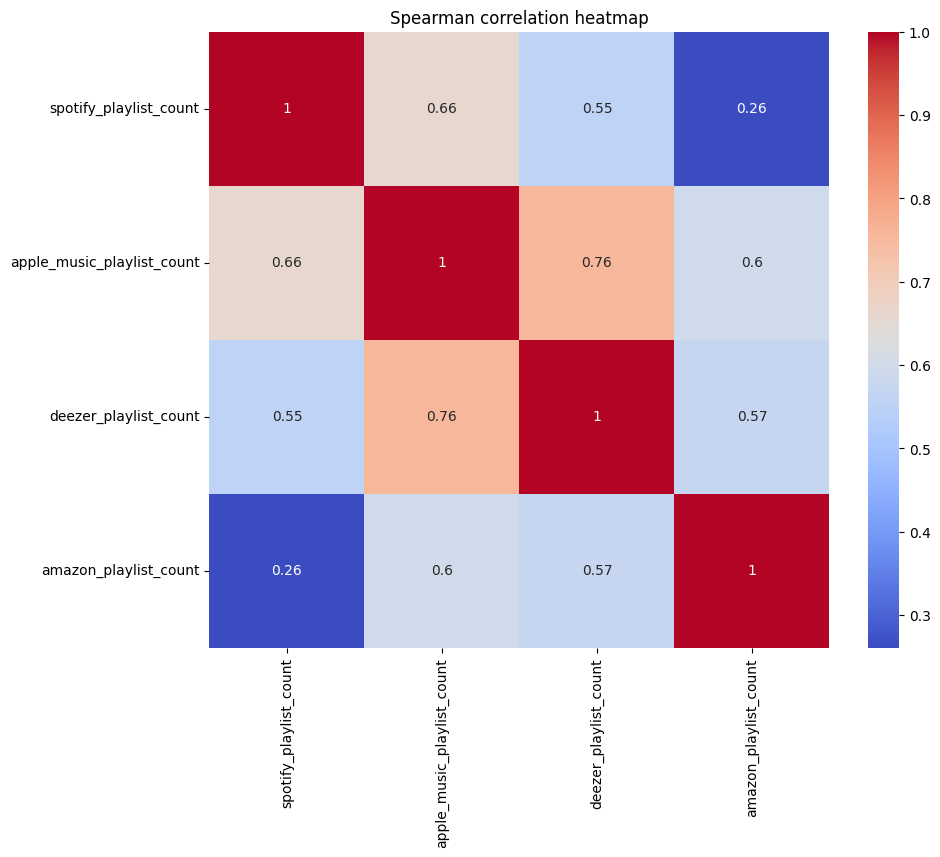

In [99]:
# Now let's try 'spearman'
corr_pearson = playlist_counts.corr(method='spearman')

plt.figure(figsize=(10, 8))
sns.heatmap(corr_pearson, annot=True, cmap='coolwarm')
plt.title('Spearman correlation heatmap')
plt.show()

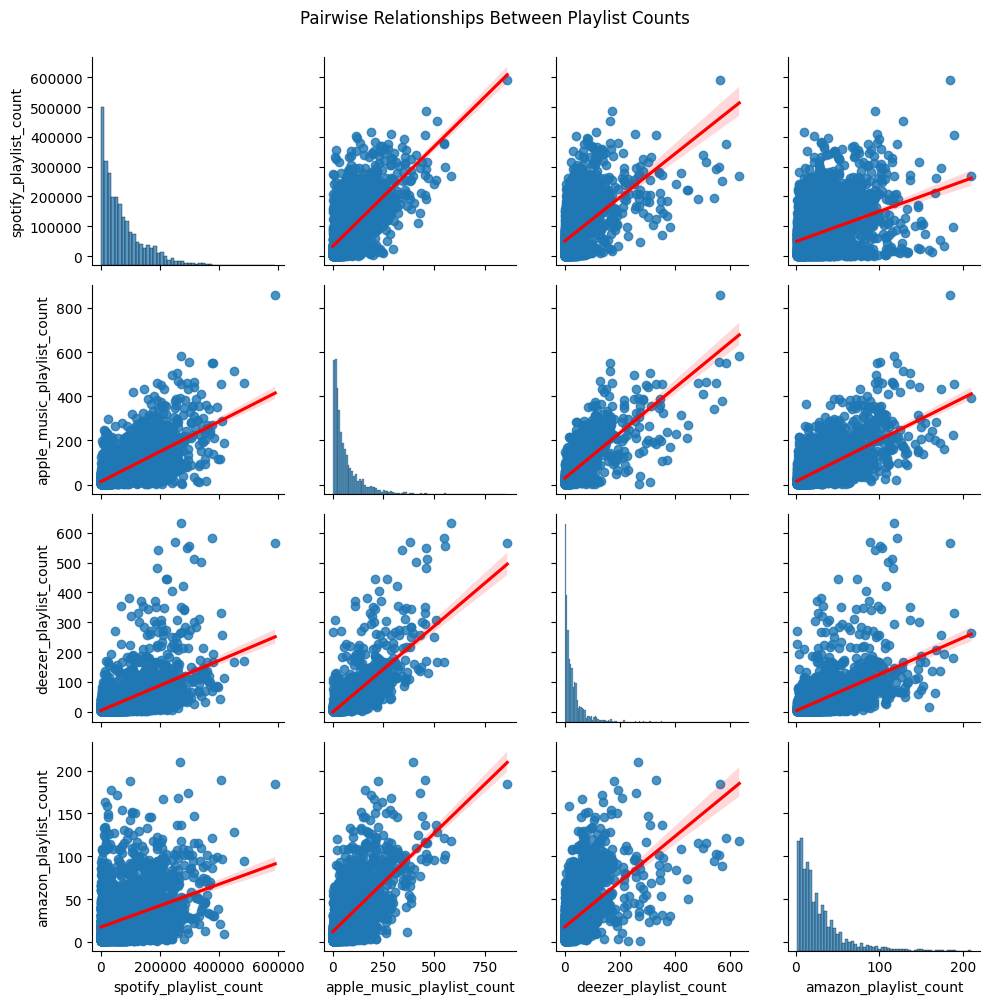

In [ ]:
# Now to display them all together, we can use pairplot to visualize the relationships between the playlist counts.
sns.pairplot(playlist_counts, kind='reg', plot_kws={'line_kws': {'color': 'red'}})
plt.suptitle('Pairwise Relationships Between Song Playlist Counts', y=1)
plt.tight_layout()
plt.show()

### Problem 8. TikTok stuff (2 points)
The most popular songs on TikTok released every year show... interesting behavior. Which years peaked the most TikTok views? Show an appropriate chart. Can you explain this behavior? For a bit of context, TikTok was created in 2016.

Now, how much popular is the most popular song for each release year, than the mean popularity? Analyze the results.

In both parts, it would be helpful to see the actual songs.

### * Problem 9. Explore (and clean) at will
There is a lot to look for here. For example, you can easily link a song to its genres, and lyrics. You may also try to link artists and albums to more info about them. Or you can compare and contrast a song's performance across different platforms, in a similar manner to what you already did above; maybe even assign a better song ranking system (across platforms with different popularity metrics, and different requirements) than the one provided in the dataset.